In [3]:
import time
from collections import defaultdict
from app.factor.factorModel import factorModel  
import pandas as pd
import numpy as np
import numpy.linalg as nlg 

self = factorModel()

Equity_Idx_Monthly_Equity_Returns, Monthly_Equity_Returns, Monthly_Factor_Score, Equity_Idx_Monthly_Factor_Score, Daily_Equity_Returns, benchmark_dailyret= self.getData()


factor_names = list(Monthly_Factor_Score.keys())
month_names = list(Monthly_Equity_Returns.keys())
stock_names = list(Equity_Idx_Monthly_Factor_Score.keys())

ICList = []

for factor in factor_names:
    ICList.append(self.calcIC(month_names, Monthly_Factor_Score[factor], Monthly_Equity_Returns)[1])
ICList = pd.DataFrame(ICList).T
ICList.index = month_names
ICList.columns = factor_names

In [4]:
minMonth = 2
maxMonth = 5

availMonth = len(month_names)

if availMonth < maxMonth:
    startMonth = month_names[0]
else:
    startMonth = month_names[availMonth-maxMonth]

res = defaultdict(list)

endMonth = month_names[-1]

for factor in Monthly_Factor_Score:
    for date in Monthly_Factor_Score[factor]:
        #print(date, int(date) >= int(startMonth), int(date) <= int(endMonth))
        if int(date) >= int(startMonth) and int(date) <= int(endMonth):
            res[factor] += Monthly_Factor_Score[factor][date]

res = pd.DataFrame(res)

ICList = ICList.tail(min(maxMonth, ICList.shape[0]))

covar = np.cov(ICList, rowvar=False)
corr = np.corrcoef(res, rowvar=False)
D = np.diag(np.sqrt(np.diag(covar)))
covar = D @ nlg.inv(corr) @ D

mat = nlg.inv(covar)                 
weight = mat*np.mat(ICList.mean()).reshape(len(mat),1)
weight = np.array(weight.reshape(len(weight),))[0]
weight.tolist()






<Axes: >

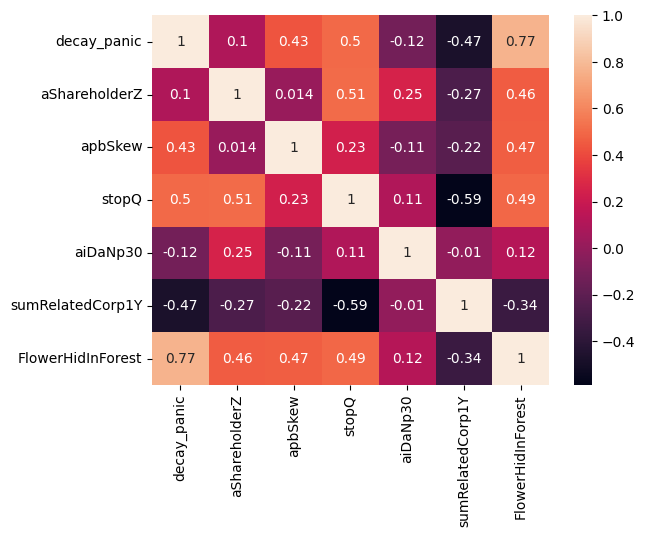

In [9]:
import seaborn as sns
sns.heatmap(ICList.corr(), annot=True)

<Axes: >

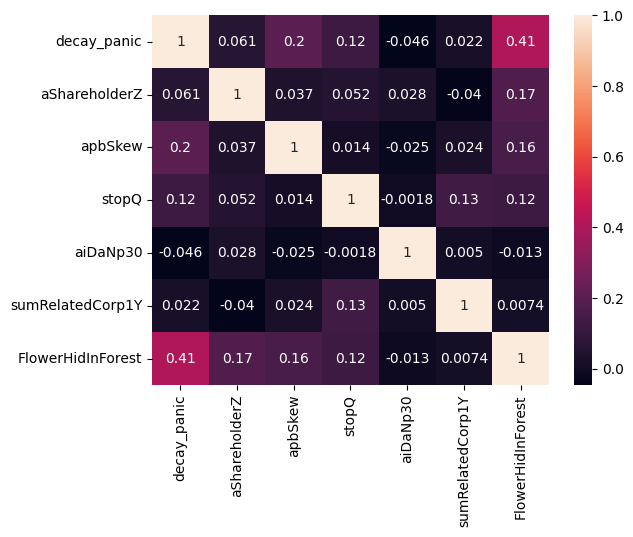

In [7]:
import seaborn as sns
sns.heatmap(res.corr(), annot=True)

In [4]:
ic

array([[ 1.        ,  0.10010085,  0.43216362,  0.4993767 , -0.11768434,
        -0.47342689,  0.76877752],
       [ 0.10010085,  1.        ,  0.01412778,  0.50955822,  0.25249936,
        -0.27060923,  0.45948622],
       [ 0.43216362,  0.01412778,  1.        ,  0.23099668, -0.10618711,
        -0.22337875,  0.46567052],
       [ 0.4993767 ,  0.50955822,  0.23099668,  1.        ,  0.10633239,
        -0.58770862,  0.49475265],
       [-0.11768434,  0.25249936, -0.10618711,  0.10633239,  1.        ,
        -0.01033255,  0.12237878],
       [-0.47342689, -0.27060923, -0.22337875, -0.58770862, -0.01033255,
         1.        , -0.33989282],
       [ 0.76877752,  0.45948622,  0.46567052,  0.49475265,  0.12237878,
        -0.33989282,  1.        ]])

In [21]:
np.corrcoef(ICList, rowvar=False).shape

(7, 7)

In [ ]:
#corr to covar
covar = np.cov(ICList)
corr = np.corrcoef(res)

D = np.diag(np.sqrt(np.diag(covar)))
covar = D @ corr @ D

In [26]:
# mat = nlg.inv(covar)                    
# weight = mat*np.mat(IC.mean()).reshape(len(mat),1)

# weight = np.array(weight.reshape(len(weight),))[0]
# weight = weight.tolist()

array([[0.06398837, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.07290269, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03887397, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.06560652, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.12638302]])

In [ ]:
corr = np.corrcoef(ICList)
covar = np.cov(ICList)

In [7]:
newScore = defaultdict(list)
for k, v in Monthly_Factor_Score.items():
    newScore[key] = 
    # newLst[key] = np.vstack([np.array(i) for i in Monthly_Factor_Score[key].values()])



In [23]:
res.keys()

dict_keys(['20210104', '20210201', '20210301', '20210401', '20210506', '20210601', '20210701', '20210802', '20210901', '20211008', '20211101', '20211201', '20220104', '20220207', '20220301', '20220401', '20220505', '20220601', '20220701', '20220801', '20220901', '20221010', '20221101', '20221201', '20230103', '20230201', '20230301', '20230403', '20230504', '20230601', '20230703'])

In [28]:
Monthly_Factor_Score['decay_panic'].values()

dict_values([[0.48051161416722354, 0.9211278804885948, 0.889756500463043, -1.1402142953988255, 0.9286019490838238, 0.16563335019562858, 0.6092698035587634, -0.4236068145419843, 0.4410574549432643, 0.6247031866831065, 0.8758192117533046, 0.9188320845333593, 0.34507661816181373, 0.6936500966581031, -1.3420487245435835, -0.7508304356715273, 0.7734207149186875, 0.26627362382504965, 0.9119976247455501, 0.5343738513747636, 0.20390904216112898, 0.7502139179923134, 0.8302684898074443, -0.45757971960683547, -1.4094746020648525, 0.6587547870247918, 0.7997077791133768, -0.34732594326748917, -1.8653232884823527, 0.7573144604642086, 0.7878784086904013, 0.943259477141127, 0.6765049528636609, -0.10846897198538769, -0.6239713579867491, 0.029601822808639038, 0.8663104253720955, -1.975388836510129, 0.7321938213214854, -2.3345032829264807, 0.7690520909074031, 0.5776446305625694, 0.24508301085607662, -0.0014408366573924036, 0.9518615582110339, 0.8673571838683505, 0.5999216384620183, 0.6276240616803506, -1

In [ ]:
#covar to corr
Dinv = np.diag(1 / np.sqrt(np.diag(covar))) 
corr = Dinv @ covar @ Dinv

In [22]:
#corr to covar
D = np.diag(np.sqrt(np.diag(covar)))
covar = D @ corr @ D